# Image Processing 03

```
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage.filters import try_all_threshold, threshold_otsu, threshold_local, sobel, gaussian
from skimage import exposure
from skimage.transform import rotate, resize, rescale
```

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu
from skimage.filters import threshold_local
from skimage.filters import sobel
from skimage.filters import gaussian
from skimage import exposure
from skimage.transform import rotate, resize, rescale

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [7]:
def plot_comparison(original, original_title, filtered, title_filtered):
    
    fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize=(12, 8), sharex= True, sharey= True)
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title(original_title)
    ax1.axis('off')
    ax2.imshow(filtered, cmap= plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

## Transformations
* Sometimes we may need to transform images by rotating or resizing them.
* For example, if we need to pass images to a Machine Learning model, so it can classify it the image is of a cat or a dog, and we need the image to be upright

#### Why transform images?
* Preparing images for classification in Machine Learning models
* Optimization and compression of images
* Save images with same proportion before processing

### Rotating
* We have previously flipped images using `NumPy`.
* **Rotating images** allows us to apply angles: 
    * When you rotate an image **90 degrees clockwise** (to the **right**)
    * When you rotate an image **90 degrees counter-clockwise** (to the **left**)
    * When you rotate an image **180 degrees clockwise or counter-clockwise** (**upside-down**)
* We can use the `rotate` function from the scikit-image module `transform` to rotate an image by a ceratin angle around it's center.
    * The first parameter is the image we want to rotate and the second parameter is the angle.
    * **The rotation angle is in degrees in counter-clockwise direction.**
        * If we want to rotate clockwise (to the right), we need to specify **negative numbers** as angle degrees.
        * If we want to rotete counter-clockwise (to the left), we need to specify **positive numbers** as angle degerees.

In [4]:
from skimage.transform import rotate

```
# Rotate the image 90 degrees clockwise
image_rotated = rotate(image, -90)

show_image(image, 'Original')
show_image(image_rotated, 'Rotated 90 degrees clockwise')
```

### Rescaling
* The `rescale` operation resizes an image by a given scaling factor.
    * This can either be a ingle floating point value, or multiple values (one for each axis)
    * We can use the `rescale` function from the `transform` module.
    
#### Downgrading

```
from skimage.transform import rescale

# Rescale the image to be 4 times smaller
image_rescaled = rescale(image, 1/4, anti_aliasing=True, multichannel= True)
```
* Setting an **`anti_aliasing`** parameter to `True` specifies if applying a filter to smooth the image prior to down-scaling. 
    * This will be cover further later on.

### Aliasing in digital images
* In a digital image, **aliasing** is a pattern or a rippling effect
* Aliasing makes the image look like it has waves or ripples radiating from a certain portion. **This happens because the pixelation of the image is poor;** the image simply does not look right
* In other words, **aliasing** is an effect that causes different signals, in this case pixels, to become indistinguishable or distorted.
* With `anti_aliasing = True`, an image appears softer 
* With `anti_aliasing = False`, an image appears more pixelated

### Resizing
* **Resizing** is used for making images match a certain size (the same purpose as rescale)< but allows to specify an output image shape, rather than a scaling factor
* We can use the `resize` function from the `transform` module
* This function requires the original image as the first parameter

```
from skimage.transform import resize

# Height and width to resize
height = 400
width = 500

# Resize image
image_resized = resize(image, (height, weight), anti_aliasing= True)
```

### Resizing proportionally
* If we want to avoid disproporionate dimensions, we can resize an image proportionally by taking the original by **taking the original height and width size of the image and dividing it by the scaling factor.**

```
from skimage.transform import resize

# Set proportional height so it is one fourth its size, or four times smaller
height = image.shape[0] / 4
width = image.shape[1] / 4

#Resize image
image_resized = resize(image, (height, width), anti_aliasing=True)
```
* Above we obtain a good-looking and proportionally accurate resizing.

```
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)

# Show the resulting images
show_image(rescaled_with_aa, "Transformed with anti aliasing")
show_image(rescaled_without_aa, "Transformed without anti aliasing")
```

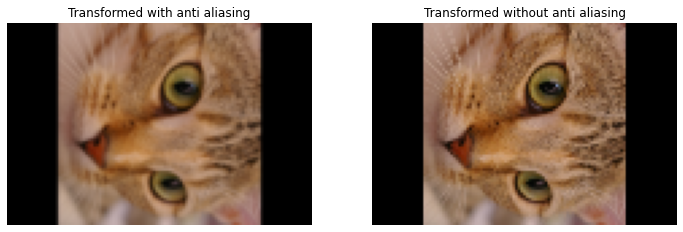

In [10]:
#from skimage.transform import rotate, rescale
image_cat = data.cat()
rotated_cat_image = rotate(image_cat, -90)
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)
plot_comparison(rescaled_with_aa, "Transformed with anti aliasing", rescaled_without_aa, "Transformed without anti aliasing")

#### Enlarging Images
Have you ever tried resizing an image to make it larger? This usually results in loss of quality, with the enlarged image looking blurry.

The good news is that the algorithm used by scikit-image works very well for enlarging images up to a certain point.

In this exercise you'll enlarge an image three times!!

You'll do this by rescaling the image of a rocket, that will be loaded from the data module.

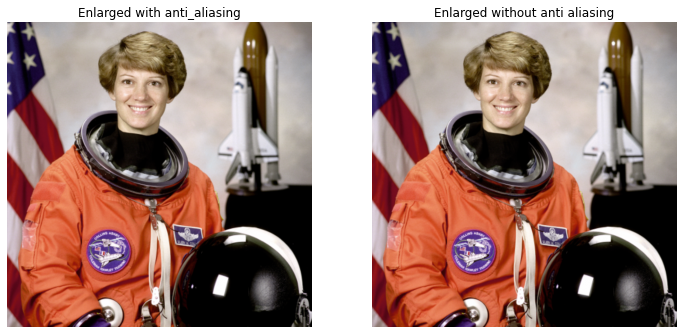

In [14]:
# Import the module and function to enlarge images
#from skimage.transform import rescale

# Import the data module
#from skimage import data

# Load the image from data
astro_image = data.astronaut()

# Enlarge the image so it is 3 times bigger with aa
enlarged_astro_image_aa = rescale(astro_image, 3, anti_aliasing=True, multichannel=True)


# Enlarge the image so it is 3 times bigger without aa
enlarged_astro_image_no_aa = rescale(astro_image, 3, anti_aliasing=False, multichannel=True)

plot_comparison(enlarged_astro_image_aa, 'Enlarged with anti_aliasing', enlarged_astro_image_no_aa, 'Enlarged without anti aliasing')

### Proportionally resizing

We want to downscale the images of a veterinary blog website so all of them have the same compressed size.

It's important that you do this proportionally, meaning that these are not distorted.

First, you'll try it out for one image so you know what code to test later in the rest of the pictures.

Remember that by looking at the shape of the image, you can know its width and height.

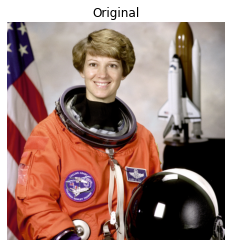

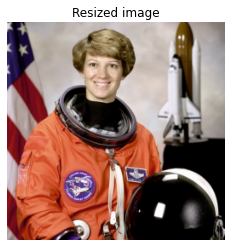

In [17]:
# Import the module and function
#from skimage.transform import resize


# Set proportional height so its half its size
height = int(astro_image.shape[0] / 2)
width = int(astro_image.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(astro_image, (height, width),
                       anti_aliasing=True)

# Show the original and resized image
show_image(astro_image, 'Original')
show_image(image_resized, 'Resized image')

### Morphology